In [1]:
import pandas as pd

In [2]:
kenya_pop_density = pd.read_csv(r'C:\Users\pc\Downloads\Energy_Access_&_Electrification_Planning_in_Kenya\data\pop_density_data\2020.csv')
kenya_pop_density

,X,Y,Z
0,35.244583,5.462084,52.668011
1,35.252917,5.462084,42.566807
2,35.261250,5.462084,39.304050
3,35.269583,5.462084,41.851067
4,35.277917,5.462084,38.238289
...,...,...,...
680257,39.402917,-4.704583,166.426895
680258,39.411250,-4.704583,205.901260
680259,39.369583,-4.712916,0.000000
680260,39.377917,-4.712916,208.989548


**Data Extraction & Analysis: Population Density**

In [3]:
import glob
import os

# Define the path to your CSV files
path = r'C:\Users\pc\Downloads\Energy_Access_&_Electrification_Planning_in_Kenya\data\pop_density_data'
pop_files = glob.glob(path + "/*.csv")

# Initialize a list to hold each DataFrame
pop_dfs = []

# Loop over each file to process it
for file in pop_files:
    year = os.path.basename(file).split('.')[0]
    pop_df = pd.read_csv(file)
    pop_df = pop_df.rename(columns={'Z': year, 'X':'Latitude', 'Y':'Longitude'})

    # Append the DataFrame to the list
    pop_dfs.append(pop_df)

# Merge all DataFrames on 'X' and 'Y' columns
pop_density_df = pop_dfs[0]
for pop_df in pop_dfs[1:]:
    pop_density_df = pop_density_df.merge(pop_df, on=['Latitude', 'Longitude'], how='outer')

pop_density_df

,Latitude,Longitude,2000,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,35.244583,5.462084,1.416720,1.396852,1.624173,1.924415,2.429911,2.503574,3.391726,3.823526,...,7.716132,10.052105,11.457187,17.609232,18.419613,21.129835,26.949865,35.308475,39.717140,52.668011
1,35.252917,5.462084,1.413419,1.372664,1.583961,1.867518,2.361063,2.378553,3.223956,3.587913,...,7.106965,8.990801,10.381531,15.599761,15.981864,17.861954,23.140518,29.548529,32.403442,42.566807
2,35.261250,5.462084,1.418887,1.330445,1.540141,1.809350,2.250990,2.280811,3.042585,3.314642,...,6.575239,8.322875,9.466146,14.218251,14.787646,16.177166,21.212101,26.670294,29.277493,39.304050
3,35.269583,5.462084,1.457395,1.385305,1.572818,1.860333,2.281828,2.322971,3.142808,3.381774,...,6.775673,8.556246,9.631298,14.553508,15.171118,16.479475,22.152906,27.807093,30.655039,41.851067
4,35.277917,5.462084,1.512301,1.383120,1.565848,1.837749,2.219377,2.283923,3.029301,3.247593,...,6.441066,7.914247,9.031144,13.881150,14.152464,15.410886,20.551128,25.901073,28.307270,38.238289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680380,39.402917,-4.704583,126.856934,114.480789,92.233864,51.968880,38.705093,36.720055,32.964993,33.610413,...,41.805164,38.985413,81.165375,39.789425,75.514580,152.778000,154.110641,143.955246,149.165466,166.426895
680381,39.411250,-4.704583,172.707367,150.494247,120.754379,74.849098,54.277927,52.671711,47.649155,47.568836,...,60.505344,56.823631,107.771729,59.105076,106.717369,199.424561,185.219086,184.364685,194.443283,205.901260
680382,39.369583,-4.712916,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
680383,39.377917,-4.712916,67.794678,17.083441,15.369174,15.428894,11.420929,13.993786,11.441626,10.612007,...,12.901483,13.024007,16.545351,13.038383,17.950626,173.214050,202.145950,170.369278,181.272644,208.989548


In [4]:
pop_density_df.isna().sum()

Latitude         0
Longitude        0
2000             0
2001           123
2002           123
2003           123
2004           123
2005           123
2006           123
2007           123
2008           123
2009           123
2010           123
2011           123
2012         15620
2013           123
2014           123
2015           123
2016           123
2017           123
2018           123
2019           123
2020           123
dtype: int64

In [5]:
desc = pop_density_df.describe()

pop_density_df_median = pop_density_df.median()
pop_density_df_mode = pop_density_df.mode().iloc[0]

# Add median and mode to the summary statistics
desc.loc['median'] = pop_density_df_median
desc.loc['mode'] = pop_density_df_mode

desc

,Latitude,Longitude,2000,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,680385.000000,680385.000000,680385.000000,680262.000000,680262.000000,680262.000000,680262.000000,680262.000000,680262.000000,680262.000000,...,680262.000000,664765.000000,680262.000000,680262.000000,680262.000000,680262.000000,680262.000000,680262.000000,680262.000000,680262.000000
mean,37.861907,0.573581,50.927232,52.459902,54.000005,55.613002,57.289448,59.018250,60.824189,62.662968,...,70.889556,74.859941,75.513673,77.967967,80.553650,83.250692,86.040443,88.969168,92.033193,95.214693
std,1.913418,2.243391,320.932973,338.698894,349.132566,361.373502,374.837981,387.024269,401.239046,414.478211,...,476.480483,502.057518,512.381152,536.079582,553.170439,573.424865,593.883451,615.075237,637.065595,661.822734
min,33.911250,-4.721250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000256,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.252917,-1.179583,1.313963,1.213779,1.243484,1.267215,1.248924,1.305102,1.379348,1.426990,...,1.699221,1.967763,1.987099,1.819858,2.170963,2.202294,2.339124,2.448167,2.578045,2.688723
50%,37.961250,0.545417,4.618363,4.307683,4.510057,4.749110,4.849887,5.124676,5.464599,5.723913,...,7.065644,7.878909,8.322715,8.067155,9.381569,9.787829,10.520063,11.184121,11.858059,12.548709
75%,39.461250,2.437084,19.172338,18.049306,18.899896,19.815576,19.939114,21.113575,22.152358,23.193607,...,27.750169,30.622528,32.024692,31.613075,35.249906,39.111917,41.275894,43.627444,45.831752,48.195143
max,41.877917,5.462084,73272.679688,78880.398438,82250.742188,87578.140625,90830.289062,95338.015625,98978.320312,102166.289062,...,117108.632812,123729.703125,129937.796875,134740.765625,139931.328125,145386.234375,151110.140625,156010.750000,162006.625000,167454.390625
median,37.961250,0.545417,4.618363,4.307683,4.510057,4.749110,4.849887,5.124676,5.464599,5.723913,...,7.065644,7.878909,8.322715,8.067155,9.381569,9.787829,10.520063,11.184121,11.858059,12.548709
mode,39.219583,-1.012916,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.820851,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [6]:
pop_density_df = pop_density_df.fillna(pop_density_df.mode().iloc[0])
pop_density_df.isna().sum()

Latitude     0
Longitude    0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
2014         0
2015         0
2016         0
2017         0
2018         0
2019         0
2020         0
dtype: int64

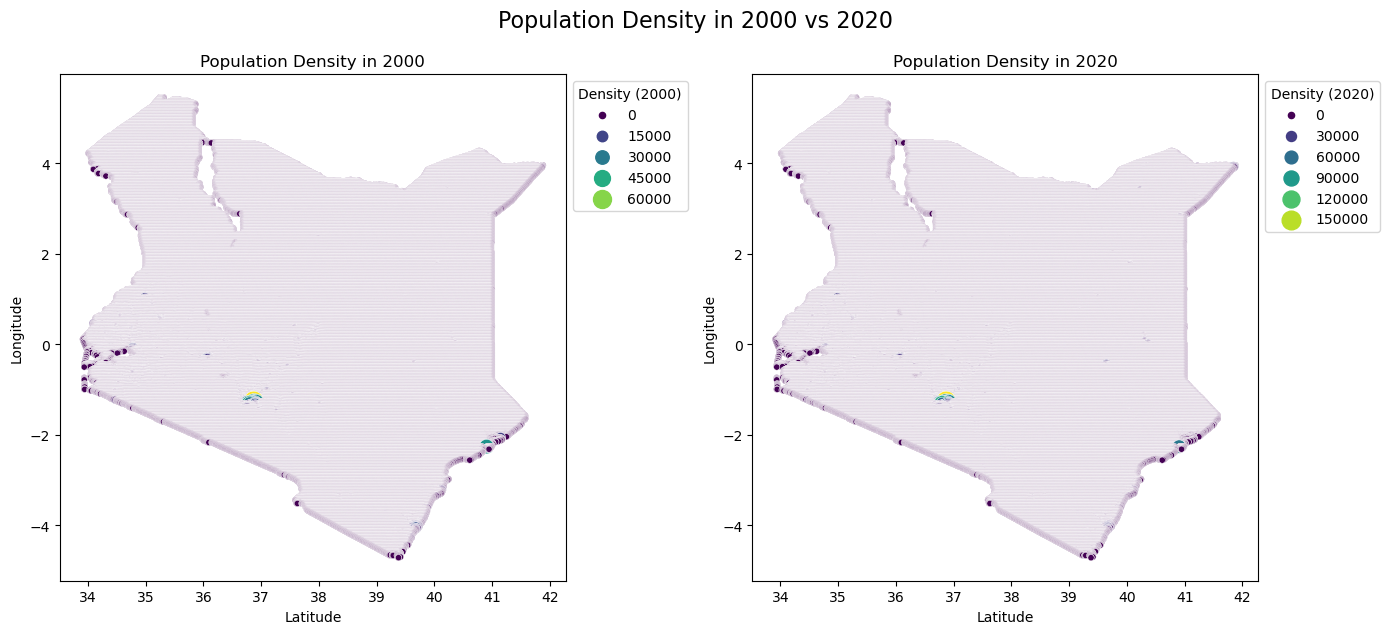

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

# Plot for 2000
plt.subplot(1, 2, 1)
sns.scatterplot(data=pop_density_df, x='Latitude', y='Longitude', hue='2000', palette='viridis', size='2000', sizes=(20, 200))
plt.title('Population Density in 2000')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend(title='Density (2000)', loc='upper left', bbox_to_anchor=(1, 1))

# Plot for 2020
plt.subplot(1, 2, 2)
sns.scatterplot(data=pop_density_df, x='Latitude', y='Longitude', hue='2020', palette='viridis', size='2020', sizes=(20, 200))
plt.title('Population Density in 2020')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend(title='Density (2020)', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.suptitle('Population Density in 2000 vs 2020', y=1.05, fontsize=16)
plt.show()


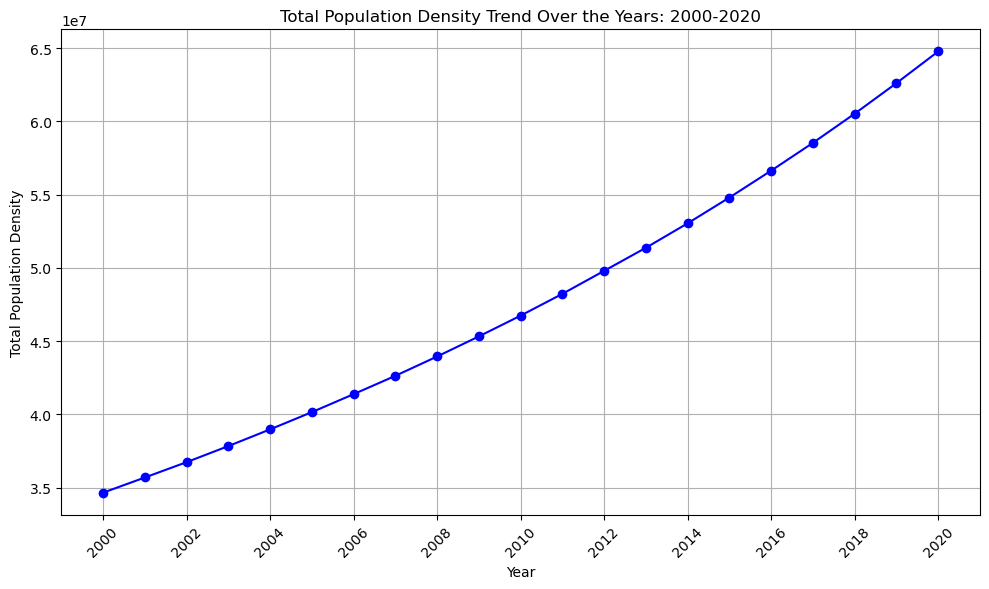

In [8]:
# Total population density per year
year_columns = pop_density_df.columns[2:]
annual_total_density = pop_density_df[year_columns].sum()

# Plot the trend
plt.figure(figsize=(10, 6))
plt.plot(annual_total_density.index, annual_total_density.values, marker='o', color='b')
plt.xlabel("Year")
plt.ylabel("Total Population Density")
plt.title("Total Population Density Trend Over the Years: 2000-2020")
plt.grid(True)
plt.xticks(ticks=annual_total_density.index[::2], rotation=45)

plt.tight_layout()
plt.show()


**Data Extraction & Analysis: Income Level**

% of population living in households with consumption or income per person below the $2.15 poverty line

In [9]:
import geopandas as gpd

shp_file_path = r'C:\Users\pc\Downloads\Energy_Access_&_Electrification_Planning_in_Kenya\data\income_level_data\GSAP_AM24_2021.shp'
gdf = gpd.read_file(shp_file_path)

print(gdf.shape)
gdf.head()

c:\Users\pc\anaconda3\Lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: C:\Users\pc\Downloads\Energy_Access_&_Electrification_Planning_in_Kenya\data\income_level_data\GSAP_AM24_2021.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  return ogr_read(


(1835, 10)


,code,geo_year,geo_source,geo_level,geo_idvar,geo_id,geo_nvar,geo_name,geo_code,geometry
0,ABW,NaN,None,None,None,None,None,Aruba (Neth.),ABW_2020_WB0,"POLYGON ((-69.99694 12.57758, -69.93639 12.531..."
1,AFG,NaN,None,None,None,None,None,Afghanistan,AFG_2020_WB0,"POLYGON ((74.54235 37.02167, 74.54742 37.01567..."
2,AGO,2015.0,GAUL,1,ADM1_CODE,398,ADM1_NAME,Bengo,AGO_2015_GAUL1_398,"POLYGON ((13.14401 -9.33313, 13.14405 -9.33316..."
3,AGO,2015.0,GAUL,1,ADM1_CODE,399,ADM1_NAME,Benguela,AGO_2015_GAUL1_399,"POLYGON ((13.79886 -11.77102, 13.79883 -11.771..."
4,AGO,2015.0,GAUL,1,ADM1_CODE,400,ADM1_NAME,Bie,AGO_2015_GAUL1_400,"POLYGON ((16.79741 -10.77021, 16.80907 -10.772..."


In [10]:
kenya_income_level = gdf[gdf['code'] == 'KEN']

print(kenya_income_level.shape)
kenya_income_level.head()

(47, 10)


,code,geo_year,geo_source,geo_level,geo_idvar,geo_id,geo_nvar,geo_name,geo_code,geometry
679,KEN,2022.0,GADM,1,GID_1,KEN.1_1,NAME_1,Baringo,KEN_2022_GADM1_KEN.1_1,"MULTIPOLYGON (((35.7388 -0.19544, 35.72428 -0...."
680,KEN,2022.0,GADM,1,GID_1,KEN.2_1,NAME_1,Bomet,KEN_2022_GADM1_KEN.2_1,"POLYGON ((35.26033 -1.01608, 35.26021 -1.01621..."
681,KEN,2022.0,GADM,1,GID_1,KEN.3_1,NAME_1,Bungoma,KEN_2022_GADM1_KEN.3_1,"POLYGON ((34.91305 0.85131, 34.91327 0.85148, ..."
682,KEN,2022.0,GADM,1,GID_1,KEN.4_1,NAME_1,Busia,KEN_2022_GADM1_KEN.4_1,"POLYGON ((34.02698 -0.01568, 34.02082 -0.02018..."
683,KEN,2022.0,GADM,1,GID_1,KEN.5_1,NAME_1,Elgeyo-Marakwet,KEN_2022_GADM1_KEN.5_1,"MULTIPOLYGON (((35.53068 0.22495, 35.53475 0.2..."


In [11]:
import pandas as pd
# Create an empty list to store the results
rows = []

# Iterate through each geometry and extract latitude and longitude
for index, row in kenya_income_level.iterrows():
    # Extract the geometry
    geom = row['geometry']

    # Handle MULTIPOLYGON or POLYGON types
    if geom.geom_type == 'MultiPolygon':
        for polygon in geom.geoms:  # Use geom.geoms to access individual polygons
            for coord in polygon.exterior.coords:
                rows.append({
                    'County': row['geo_name'],
                    'Latitude': coord[1],
                    'Longitude': coord[0]
                })
    elif geom.geom_type == 'Polygon':
        for coord in geom.exterior.coords:
            rows.append({
                'Latitude': coord[1],
                'Longitude': coord[0],
                'County': row['geo_name']
            })

kenya_income_level = pd.DataFrame(rows)
print(kenya_income_level.shape)
kenya_income_level

(274900, 3)


,County,Latitude,Longitude
0,Baringo,-0.195439,35.738800
1,Baringo,-0.198901,35.724277
2,Baringo,-0.195616,35.723232
3,Baringo,-0.195289,35.723129
4,Baringo,-0.194905,35.723007
...,...,...,...
274895,West Pokot,1.190623,35.422623
274896,West Pokot,1.189342,35.422203
274897,West Pokot,1.188469,35.422005
274898,West Pokot,1.187765,35.421890


In [12]:
print(kenya_income_level.County.nunique())
kenya_income_level.County.unique()

47


array(['Baringo', 'Bomet', 'Bungoma', 'Busia', 'Elgeyo-Marakwet', 'Embu',
       'Garissa', 'Homa Bay', 'Isiolo', 'Kajiado', 'Kakamega', 'Kericho',
       'Kiambu', 'Kilifi', 'Kirinyaga', 'Kisii', 'Kisumu', 'Kitui',
       'Kwale', 'Laikipia', 'Lamu', 'Machakos', 'Makueni', 'Mandera',
       'Marsabit', 'Meru', 'Migori', 'Mombasa', "Murang'a", 'Nairobi',
       'Nakuru', 'Nandi', 'Narok', 'Nyamira', 'Nyandarua', 'Nyeri',
       'Samburu', 'Siaya', 'Taita Taveta', 'Tana River', 'Tharaka-Nithi',
       'Trans Nzoia', 'Turkana', 'Uasin Gishu', 'Vihiga', 'Wajir',
       'West Pokot'], dtype=object)

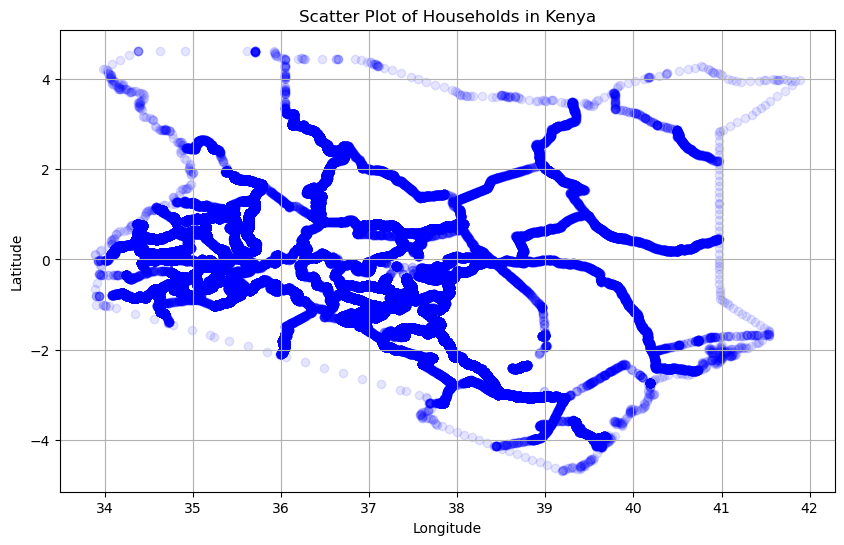

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(kenya_income_level['Longitude'], kenya_income_level['Latitude'], alpha=0.1, color='blue')

# Add labels and title
plt.title('Scatter Plot of Households in Kenya')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.grid()
plt.show()


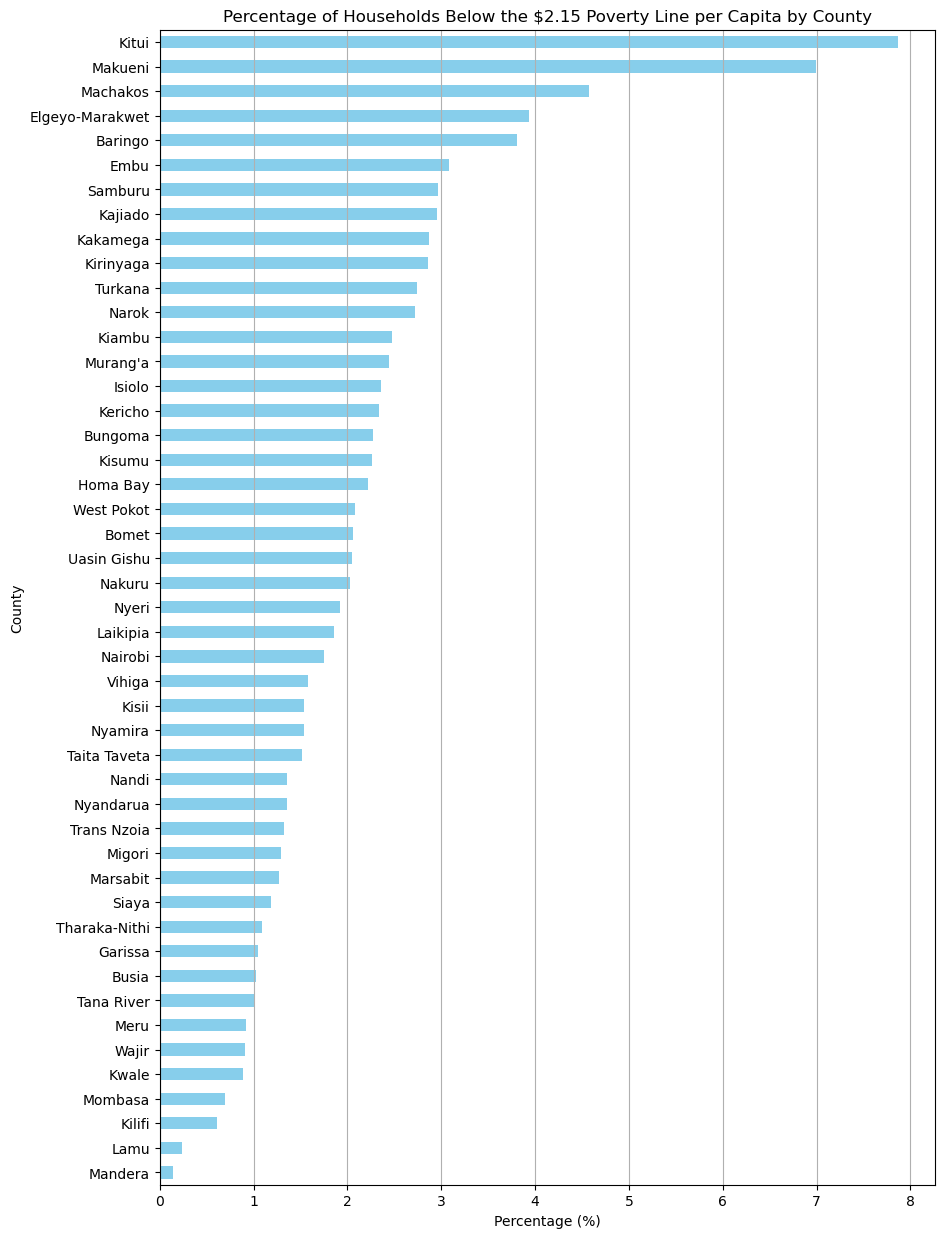

In [14]:
# Count occurrences of each county
county_counts = kenya_income_level['County'].value_counts()

# Calculate the percentage of each county
county_percentage = (county_counts / county_counts.sum()) * 100
county_percentage = county_percentage.sort_values(ascending=True)

# Plotting the horizontal bar graph
plt.figure(figsize=(10, 15))
county_percentage.plot(kind='barh', color='skyblue')

# Adding titles and labels
plt.title('Percentage of Households Below the $2.15 Poverty Line per Capita by County')
plt.xlabel('Percentage (%)')
plt.ylabel('County')

# Show the plot
plt.grid(axis='x')
plt.show()


**Data Extraction & Analysis: Renewable Potential**

a. Wind speed

In [15]:
import numpy as np
import rasterio
import pandas as pd
from rasterio.transform import rowcol
import geopandas as gpd

wind_speed = r'C:\Users\pc\Downloads\Energy_Access_&_Electrification_Planning_in_Kenya\data\renewable_potential_data\kenya_renewable_data\kenya_wind-speed_100m.tif'

# Read the TIFF file
with rasterio.open(wind_speed) as src:
    wind_data = src.read(1)
    wind_meta_data = src.profile

wind_meta_data

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': nan, 'width': 4149, 'height': 3806, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]'), 'transform': Affine(0.002500000000000124, 0.0, 33.906572682195275,
       0.0, -0.002500000000000124, 4.623268747733392), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'deflate', 'interleave': 'band'}

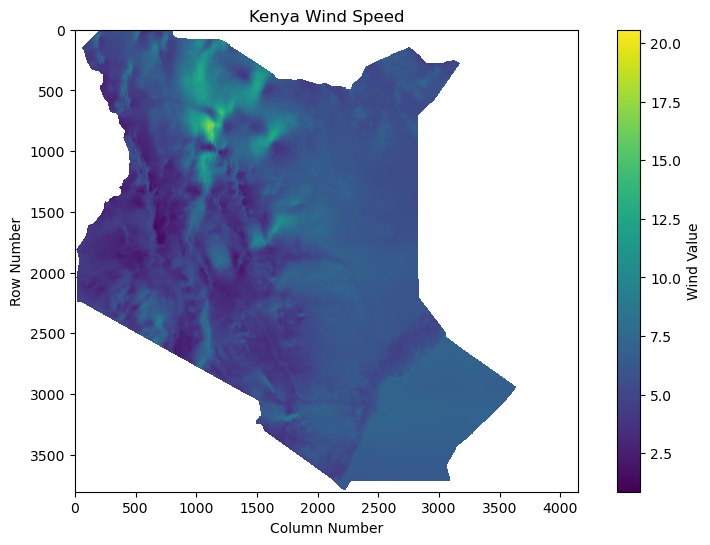

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.imshow(wind_data, cmap='viridis')
plt.colorbar(label='Wind Value')
plt.title('Kenya Wind Speed')
plt.xlabel('Column Number')
plt.ylabel('Row Number')
plt.show()

In [17]:
# Load the wind TIFF file
wind_speed = r'C:\Users\pc\Downloads\Energy_Access_&_Electrification_Planning_in_Kenya\data\renewable_potential_data\kenya_renewable_data\kenya_wind-speed_100m.tif'

with rasterio.open(wind_speed) as src:
    # Read the wind speed data from the first band
    wind_data = src.read(1)
    transform = src.transform

# List to store latitude, longitude, and wind speed values
data = []

# Loop over each pixel
for row in range(wind_data.shape[0]):
    for col in range(wind_data.shape[1]):
        # Convert row, col to latitude, longitude
        lon, lat = rasterio.transform.xy(transform, row, col)
        wind_speed = wind_data[row, col]

        # Append to data list if wind speed is valid (not a nodata value)
        if not np.isnan(wind_speed):
            data.append({'Latitude': lat, 'Longitude': lon, 'Wind Speed': wind_speed})

wind_speed_df = pd.DataFrame(data)
print(wind_speed_df)

         Latitude  Longitude  Wind Speed
0        4.622019  35.915323    6.276936
1        4.622019  35.917823    6.260634
2        4.622019  35.920323    6.232945
3        4.622019  35.922823    6.241162
4        4.622019  35.925323    6.216225
...           ...        ...         ...
8538058 -4.887981  39.480323    6.142080
8538059 -4.890481  39.472823    6.143734
8538060 -4.890481  39.475323    6.142651
8538061 -4.890481  39.477823    6.141578
8538062 -4.890481  39.480323    6.140533

[8538063 rows x 3 columns]


b. Photovoltaic Potential

In [18]:
pv_potential = r'C:\Users\pc\Downloads\Energy_Access_&_Electrification_Planning_in_Kenya\data\renewable_potential_data\kenya_renewable_data\Kenya_PVOUT_poster-map_1000x1000mm-300dpi_v20191017.tif'

# Read the TIFF file
with rasterio.open(pv_potential) as src:
    pv_data = src.read(1)
    pv_meta_data = src.profile

pv_meta_data

c:\Users\pc\anaconda3\Lib\site-packages\rasterio\__init__.py:368: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 11811, 'height': 11811, 'count': 4, 'crs': None, 'transform': Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0), 'blockxsize': 11811, 'blockysize': 1, 'tiled': False, 'compress': 'lzw', 'interleave': 'pixel'}

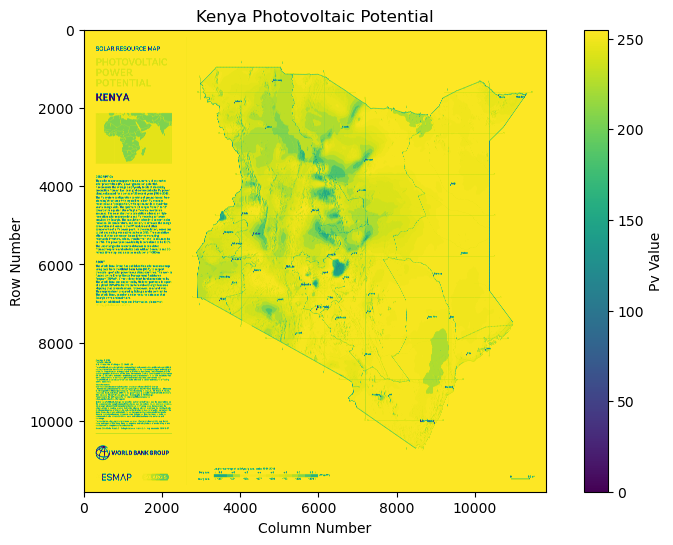

In [19]:
plt.figure(figsize=(10, 6))
plt.imshow(pv_data, cmap='viridis')
plt.colorbar(label='Pv Value')
plt.title('Kenya Photovoltaic Potential')
plt.xlabel('Column Number')
plt.ylabel('Row Number')
plt.show()

In [2]:
import numpy as np
import rasterio
import pandas as pd
from rasterio.transform import rowcol
import geopandas as gpd

direct_irradiation = r'C:\Users\pc\Downloads\Energy_Access_&_Electrification_Planning_in_Kenya\data\renewable_potential_data\kenya_renewable_data\Kenya_DNI_poster-map_1000x1000mm-300dpi_v20191017.tif'

# Read the TIFF file
with rasterio.open(direct_irradiation) as src:
    irradiation_data = src.read(1)
    irradiation_meta_data = src.profile

irradiation_meta_data

c:\Users\pc\anaconda3\Lib\site-packages\rasterio\__init__.py:367: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 11811, 'height': 11811, 'count': 4, 'crs': None, 'transform': Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0), 'blockxsize': 11811, 'blockysize': 1, 'tiled': False, 'compress': 'lzw', 'interleave': 'pixel'}

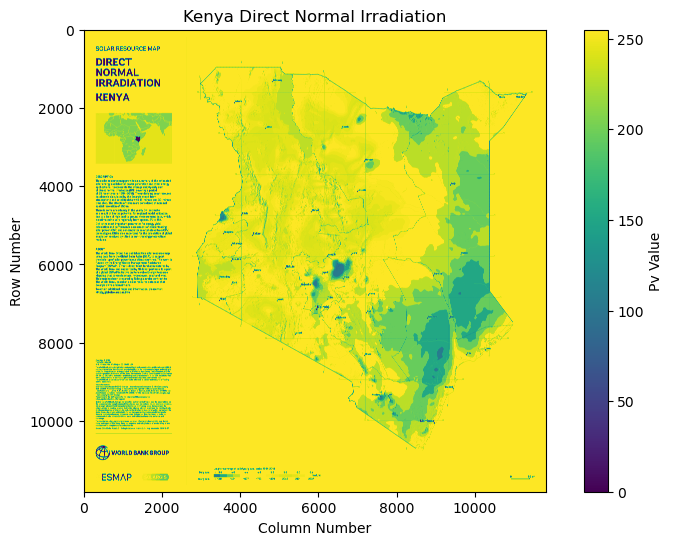

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.imshow(irradiation_data, cmap='viridis')
plt.colorbar(label='Pv Value')
plt.title('Kenya Direct Normal Irradiation')
plt.xlabel('Column Number')
plt.ylabel('Row Number')
plt.show()

In [ ]:
# Load pv TIFF file
direct_irradiation = r'C:\Users\pc\Downloads\Energy_Access_&_Electrification_Planning_in_Kenya\data\renewable_potential_data\kenya_renewable_data\Kenya_DNI_poster-map_1000x1000mm-300dpi_v20191017.tif'

with rasterio.open(direct_irradiation) as src:
    # Read the pv potential data from the first band
    irradiation_data = src.read(1)
    transform = src.transform

# List to store latitude, longitude, and pv potential values
data = []

# Loop over each pixel
for row in range(irradiation_data.shape[0]):
    for col in range(irradiation_data.shape[1]):
        # Convert row, col to latitude, longitude
        lon, lat = rasterio.transform.xy(transform, row, col)
        direct_irradiation = irradiation_data[row, col]
        
        # Append to data list if pv potential is valid (not a nodata value)
        if not np.isnan(direct_irradiation):
            data.append({'Latitude': lat, 'Longitude': lon, 'Direct Irradiation': direct_irradiation})

direct_irradiation_df = pd.DataFrame(data)
print(direct_irradiation_df)

In [13]:
import pandas as pd

generation_df = pd.read_csv(r'C:\Users\pc\Downloads\Energy_Access_&_Electrification_Planning_in_Kenya\data\electricity_generation_data\electricity-generation.csv')
generation_df 

,Entity,Code,Year,Electricity generation - TWh
0,ASEAN (Ember),NaN,2000,378.61
1,ASEAN (Ember),NaN,2001,404.85
2,ASEAN (Ember),NaN,2002,433.19
3,ASEAN (Ember),NaN,2003,458.24
4,ASEAN (Ember),NaN,2004,496.56
...,...,...,...,...
7407,Zimbabwe,ZWE,2018,9.44
7408,Zimbabwe,ZWE,2019,8.49
7409,Zimbabwe,ZWE,2020,6.71
7410,Zimbabwe,ZWE,2021,8.46


In [25]:
kenya_generation_df = generation_df[generation_df['Entity'] == 'Kenya'].reset_index(drop=True)
kenya_generation_df.head()

,Entity,Code,Year,Electricity generation - TWh
0,Kenya,KEN,2000,4.31
1,Kenya,KEN,2001,4.81
2,Kenya,KEN,2002,5.15
3,Kenya,KEN,2003,5.48
4,Kenya,KEN,2004,6.16


In [14]:
demand_df = pd.read_csv(r'C:\Users\pc\Downloads\Energy_Access_&_Electrification_Planning_in_Kenya\data\electricity_generation_data\electricity-demand.csv')
demand_df

,Entity,Code,Year,Electricity demand - TWh
0,ASEAN (Ember),NaN,2000,378.61
1,ASEAN (Ember),NaN,2001,404.85
2,ASEAN (Ember),NaN,2002,433.19
3,ASEAN (Ember),NaN,2003,458.24
4,ASEAN (Ember),NaN,2004,496.56
...,...,...,...,...
5858,Zimbabwe,ZWE,2018,10.46
5859,Zimbabwe,ZWE,2019,9.60
5860,Zimbabwe,ZWE,2020,8.69
5861,Zimbabwe,ZWE,2021,10.20


In [26]:
kenya_demand_df = demand_df[demand_df['Entity'] == 'Kenya'].reset_index(drop=True)
kenya_demand_df.head()

,Entity,Code,Year,Electricity demand - TWh
0,Kenya,KEN,2000,4.51
1,Kenya,KEN,2001,4.98
2,Kenya,KEN,2002,5.37
3,Kenya,KEN,2003,5.67
4,Kenya,KEN,2004,6.32


In [ ]:
electricity_df = pd.merge(
    kenya_demand_df[['Year', 'Electricity demand - TWh']],
    kenya_generation_df[['Year', 'Electricity generation - TWh']],
    on='Year',
    how='inner'
)

electricity_df.head()

,Year,Electricity demand - TWh,Electricity generation - TWh
0,2000,4.51,4.31
1,2001,4.98,4.81
2,2002,5.37,5.15
3,2003,5.67,5.48
4,2004,6.32,6.16


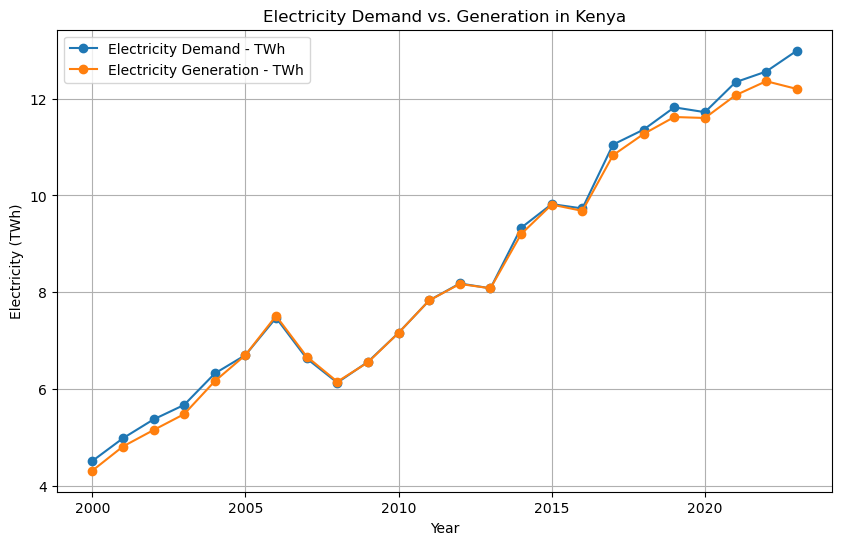

In [30]:
import matplotlib.pyplot as plt

# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(electricity_df['Year'], electricity_df['Electricity demand - TWh'], label='Electricity Demand - TWh', marker='o')
plt.plot(electricity_df['Year'], electricity_df['Electricity generation - TWh'], label='Electricity Generation - TWh', marker='o')


plt.xlabel('Year')
plt.ylabel('Electricity (TWh)')
plt.title('Electricity Demand vs. Generation in Kenya')
plt.legend()
plt.grid(True)

plt.show()
